# Frame the Problem and Look at the Big Picture

## Define the objective in business terms.

Predict the median housing price in any district, given all the other metrics

## How will your solution be used?

## What are the current solutions/workarounds (if any)?

## How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

This is a supervised offline regression problem.

## How should performance be measured?

A typical performance measure for regression problems is the Root Mean Square Error (RMSE).

## Is the performance measure aligned with the business objective?

## What would be the minimum performance needed to reach the business objective?

## What are comparable problems? Can you reuse experience or tools?

## Is human expertise available?

## How would you solve the problem manually?

## List the assumptions you (or others) have made so far.

## Very assumptions if possible.

# Get the Data

## List the data you need and how much you need.

## Find and document where you can get that data.

The data can be downloaded from the following link: [https://raw.githubusercontent.com/ageron/handson-ml/master/](https://raw.githubusercontent.com/ageron/handson-ml/master/)

## Check how much space it will take.

The file takes 1.391 MB of memory space.

## Check legal obligations, and get authorization if necessary.

## Get access authorizations.

## Create a workspace (with enough storage space).

## Get the data

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("../Data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

## Convert the data to a format you can easily manipulate (without changing the data itself).

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Ensure sensitive information is deleted or protected (eg. anonymized).

## Check the size and type of data (time series, sample, geographical, etc.).

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

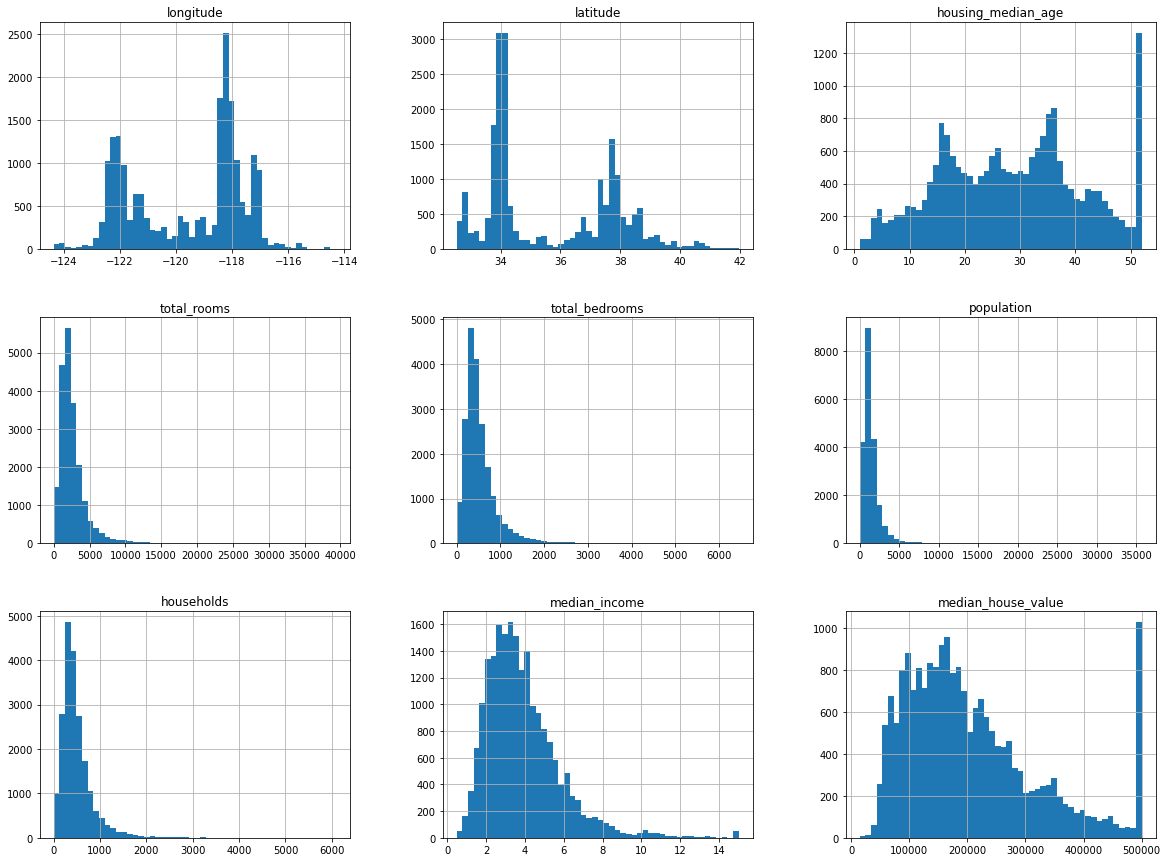

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Sample a test set, put it aside, and never look at it (no data snooping!).

### Random sampling

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified sampling

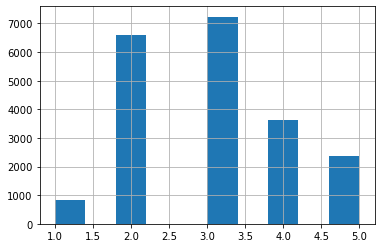

In [7]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print("Category proportions for overal dataset:\n", housing['income_cat'].value_counts() / len(housing))
print("Category proportions for stratified sampling:\n", strat_test_set["income_cat"].value_counts() / len(strat_test_set))

Category proportions for overal dataset:
 3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
Category proportions for stratified sampling:
 3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore the Data

## Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

In [10]:
housing =  strat_train_set.copy()

## Study each attribute and its characteristics.
- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
- Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [11]:
from pandas_profiling import ProfileReport

profile = ProfileReport(housing, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## For supervised learning tasks, identify the target attribute(s).

The target variable is the `housing_median_value`

## Visualize the data

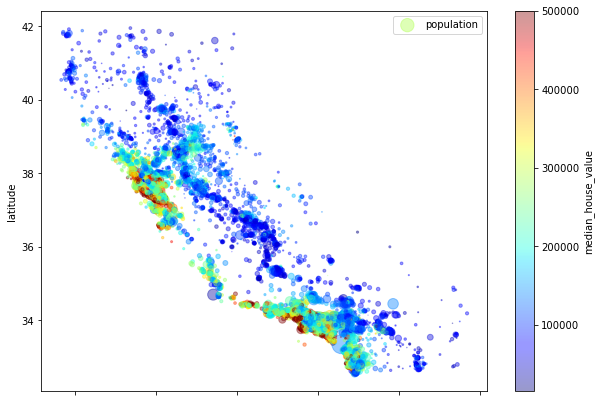

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

## Study the correlations between attributes.

In [13]:
corr_matrix = housing.corr()

median_house_value_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
median_house_value_corr

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

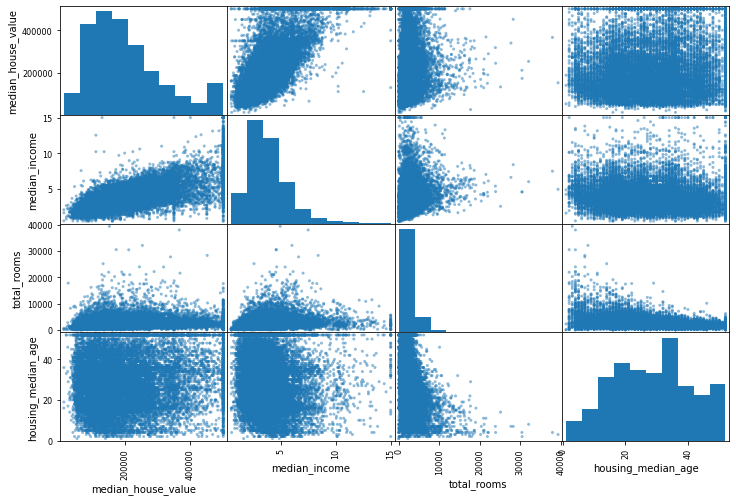

In [14]:
from pandas.plotting import scatter_matrix

attributes = median_house_value_corr.index[0:4]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

## Study how you would solve the problem manually.

## Identify the promising transformations you may want to apply.

In [18]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Identify extra data that would be useful.

## Document what you have learned.

# Prepare the Data
- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply.
    - So you can easily prepare the data the next time you get a fresh dataset
    - So you can apply these transformations in future projects
    - To clean and prepare the test set
    - To clean and prepare new data instances once your solution is live
    - To make it easy to treat your preparation choices as hyperparameters

## Data cleaning.
- Fix or remove outliers (optional)
- Fill in missing values (e.g., with zeros, mean, median...) or drop their rows (or columns) 

In [19]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

print(imputer.statistics_)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


## Feature selection (optional).
- Drop the attributes that provide no useful information for the task
- Use some dimensionality reduction technique if necessary (PCA, KernelPCA, LLE...)

## Feature engineering, where appropriate.
- Discretize continuous features
- Decompose features (e.g., categorical, date/time, etc.)
- Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.)
- Aggregate features into promising new features

### Handling Text and Categorical Attributes

In [24]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())
print(cat_encoder.categories_)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Aggregate features into promising new features

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.rooms_ix = housing.columns.get_loc("total_rooms")
        self.bedrooms_ix = housing.columns.get_loc("total_bedrooms")
        self.population_ix = housing.columns.get_loc("population")
        self.households_ix = housing.columns.get_loc("households")
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, self.rooms_ix]/ X[:, self.households_ix]
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
att_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = att_adder.transform(housing_num.values)

## Feauture scaling
- Standardize or normalize features

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_extra_attribs_scaled = scaler.fit_transform(housing_extra_attribs)
housing_extra_attribs_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.61493744,
        -0.31205452, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  1.33645936,
         0.21768338, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.5320456 ,
        -0.46531516, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.3167053 ,
         0.3469342 , -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.09812139,
         0.02499488,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.15779865,
        -0.22852947, -0.09586294]])

## Reconstruct data.
- Use pipelines to automate all steps if possible

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = housing_num.columns.tolist()
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Shortlisting Promising Models
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.

## Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.

### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [67]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [70]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [86]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18707.540211513275

## Measure and compare their performance.
- For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

In [71]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [79]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard deviation: 2731.674001798343


### Decision Tree

In [81]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-tree_scores)
display_scores(tree_rmse_score)

Scores: [69113.37473303 66553.03545027 69145.26164816 69086.53741948
 71533.16528013 74131.52491422 70110.29249108 70950.04626561
 77110.82447388 70686.04927255]
Mean 70842.01119484156
Standard deviation: 2802.0022576893343


### Random Forest

In [87]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [49674.92726449 47748.07897544 50044.80346651 52304.21747813
 49644.441953   53877.85498345 48740.855112   48132.21251842
 52757.96010459 50492.79494485]
Mean 50341.81468008764
Standard deviation: 1934.0972282986172


## Analyze the most significant variables for each algorithm.

In [108]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"].categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
def feature_importance(features, attributes):
    for f, a in sorted(zip(features, attributes), reverse=True):
        print(f"{a}\t{f}")

### Linear Regression

In [109]:
feature_importance(lin_reg.coef_, attributes)

ISLAND	110357.78363967103
median_income	74714.39134153823
households	45455.47519691452
housing_median_age	13732.838418555288
bedrooms_per_room	9249.758866973638
total_bedrooms	7330.040621029685
rooms_per_household	6605.128028015151
population_per_household	1042.9570945282062
total_rooms	-1933.127713800753
NEAR OCEAN	-14642.267150598667
<1H OCEAN	-18016.524321683355
NEAR BAY	-22479.840081835384
population	-45708.263066728425
INLAND	-55219.152085553695
longitude	-55650.411640302285
latitude	-56716.452369292114


### Decision Tree

In [110]:
feature_importance(tree_reg.feature_importances_, attributes)

median_income	0.47249044393868245
INLAND	0.14032725334921725
population_per_household	0.12322006509958382
longitude	0.06755233733965173
latitude	0.05343387797291282
housing_median_age	0.0403126636773959
rooms_per_household	0.028630776874987326
bedrooms_per_room	0.023219588257337047
total_rooms	0.013155759167679531
households	0.013032243594241833
total_bedrooms	0.011586188476959119
population	0.010091617199558653
NEAR OCEAN	0.0015810749004122357
<1H OCEAN	0.0007468861006135138
NEAR BAY	0.00041694739353389333
ISLAND	0.00020227665723287133


### Random Forest

In [111]:
feature_importance(forest_reg.feature_importances_, attributes)

median_income	0.47397609776872857
INLAND	0.13999366900155136
population_per_household	0.12287511502070475
longitude	0.05875987848005208
latitude	0.05498723511857815
housing_median_age	0.0448460005377599
rooms_per_household	0.02780904100613907
bedrooms_per_room	0.022840306608529818
total_rooms	0.013116888342765977
households	0.012342002468167945
total_bedrooms	0.012136748885769051
population	0.011985831701504596
NEAR OCEAN	0.0022430733403587776
<1H OCEAN	0.0012826433926550625
NEAR BAY	0.0007491020118622125
ISLAND	5.636631487279389e-05


## Analyze the types of errors the models make.
- What data would a human have used to avoid these errors?

## Perform a quick round of feature selection and engineering.

You may want to try dropping some of the less useful features (e.g., apparently only one 'ocean_proximity' category is really useful, so you could try dropping the others.)

## Perform one or two more quick iterations of the five previous steps.

## Shortlist the top three to five most promising models, preferring models that make different types of errors.

Random Forest is the most promising model.

# Fine-Tune the System
- You will want to use as much data as possible for this step, especially as you move towards the end of fine-tuning.
- As always automate what you can.

## Fine-tune the hyperparameters.
- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
- Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors).

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 5, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 5, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [125]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}
RandomForestRegressor(max_features=8, n_estimators=30)


In [126]:
cv_res = grid_search.cv_results_
for mean_score, param in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), param)

62562.04555566081 {'max_features': 2, 'n_estimators': 3}
55601.88369864306 {'max_features': 2, 'n_estimators': 10}
52826.373912712734 {'max_features': 2, 'n_estimators': 30}
60785.17183034343 {'max_features': 4, 'n_estimators': 3}
52922.63925067689 {'max_features': 4, 'n_estimators': 10}
50607.88960741768 {'max_features': 4, 'n_estimators': 30}
60402.852478050525 {'max_features': 5, 'n_estimators': 3}
52528.634346822335 {'max_features': 5, 'n_estimators': 10}
50226.9859833833 {'max_features': 5, 'n_estimators': 30}
58903.78118869899 {'max_features': 8, 'n_estimators': 3}
51932.605953227074 {'max_features': 8, 'n_estimators': 10}
49712.09641011258 {'max_features': 8, 'n_estimators': 30}
62112.66414729886 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54188.78519823171 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60329.45540350351 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52451.75243611977 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## Try Ensemble methods. Combining your best models will often produce better performance than running them individually.

## Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
- Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.

In [128]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

48421.10784233031


# Present Your Solution

## Document what you have down.

## Create a nice presentation.
- Make sure you highlight the big picture first.

## Explain why your solution achieves the business objective.

## Don't forget to present interesting points you noticed along the way.
- Describe what worked and what did not.
- List your assumptions and your system's limitations.

## Ensure your key findings are communicated through beautiful visalizations or easy-to-remember statements.

# Launch!

## Get your solution ready for production (plug into production data inputs, write unit tests, etc.).

## Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.
- Beware of slow degradation: models tend to "rot" as data evolves.
- Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
- Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is particularly important for online learning systems.

## Retrain your models on regular basis on fresh data (automate as much as possible).